In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaln, betaln, beta, betainc

In [20]:
def log_beta_pdf(x, a, b):
    # y = - gammaln(a) - gammaln(b) + gammaln(a+b) + np.log(x)*(a-1) + np.log(1-x)*(b-1) 
    y = - betaln(a,b) + np.log(x) * (a-1) + np.log(1-x) * (b-1)
    idx = np.where(x == 0)
    if a==1:
        # y[idx] = - gammaln(a) - gammaln(b) + gammaln(a+b)
        y[idx] = - betaln(a,b)
    elif a<1:
        y[idx] = np.Inf
    else:
        y[idx] = - np.Inf
    
    idx = np.where(x == 1)
    if b==1:
        # y[idx] = - gammaln(a) - gammaln(b) + gammaln(a+b)
        y[idx] = - betaln(a,b)
    elif b<1:
        y[idx] = np.Inf
    else:
        y[idx] = - np.Inf
    return y

def beta_inc(x, a, b):
    return beta(a, b) * betainc(a, b, x)


def beta_pdf_inc(x, a, b, lower, upper):
    beta_ab = beta(a, b)
    z = np.log(beta_ab - (beta_inc(lower, a, b) + (beta_ab - beta_inc(upper, a, b))))
    loglikelihood = (a-1) * np.log(x) + (b-1) * np.log(1-x)
    return np.exp(loglikelihood-z)

C:\Users\parla\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\parla\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


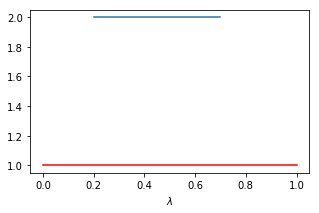

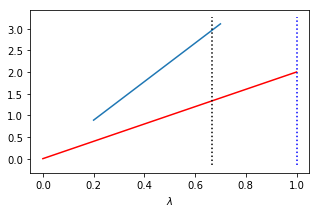

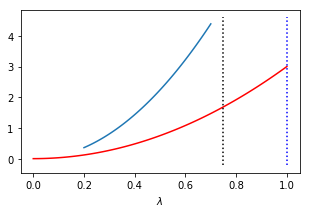

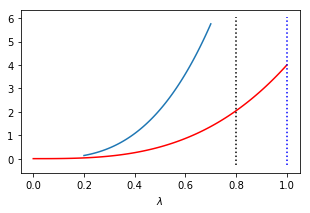

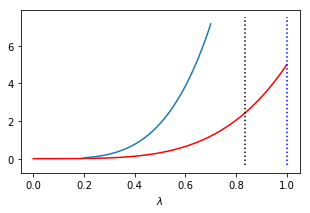

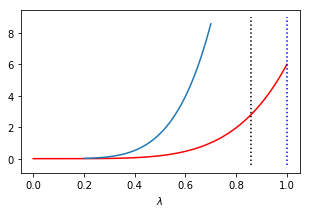

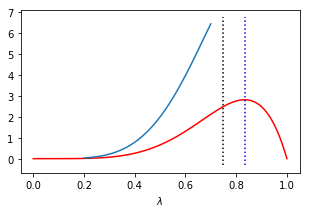

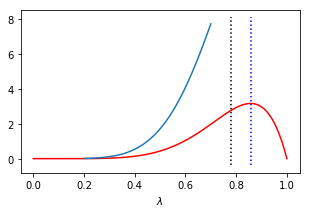

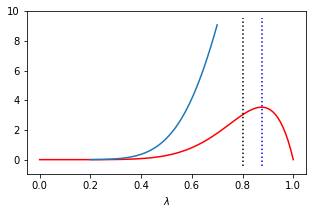

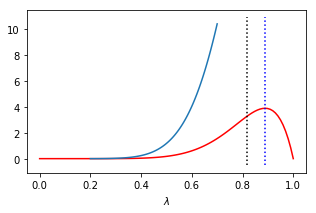

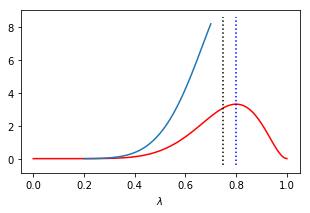

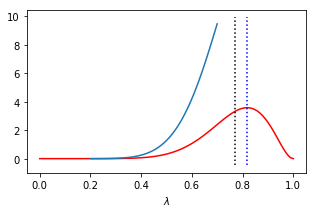

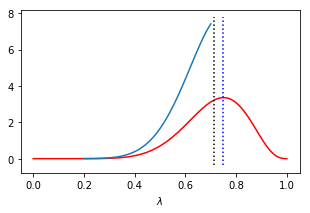

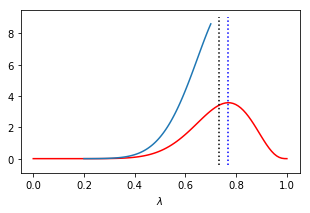

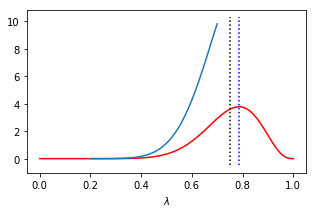

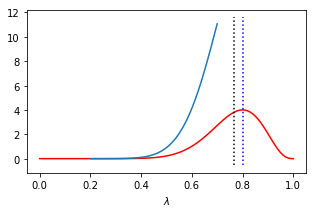

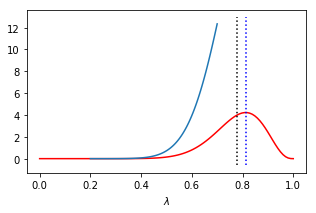

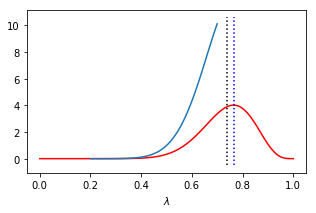

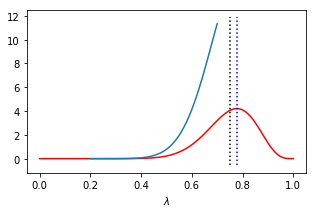

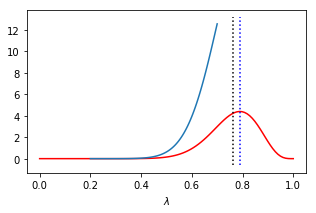

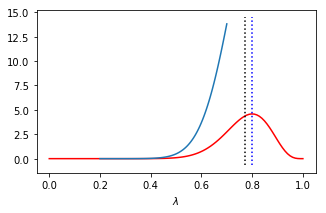

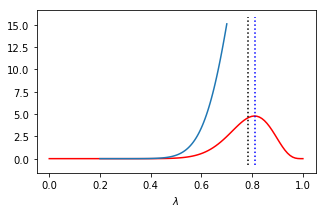

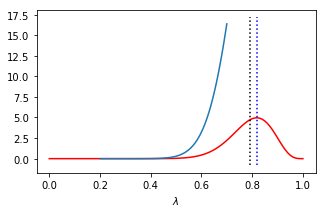

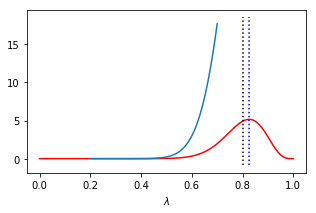

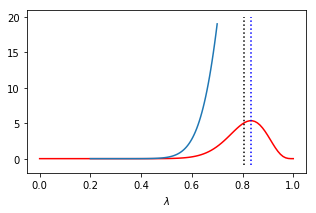

In [24]:
a = 1
b = 1

xx = [1,1,1,1,1,0,1,1,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1]

p = np.linspace(0.0, 1.0, 100)
p_2 = np.linspace(0.2, 0.7, 100)
c = [0,0]
N = 0

plt.figure(figsize=(5,3))
plt.plot(p, np.exp(log_beta_pdf(p, a+c[1], b+c[0])), 'r')
plt.plot(p_2, beta_pdf_inc(a=a, b=b, lower=0.2, upper=0.7, x=p_2))

'''
pi_ML =  (a+c[1])/(a+b+N)
yl = plt.gca().get_ylim()
plt.plot([pi_ML, pi_ML], yl , 'k:')
'''
plt.xlabel('$\lambda$')
#plt.savefig('/Users/cemgil/Dropbox/tex/cam/talks/cmpe547/beta{n}.eps'.format(n=N), bbox_inches='tight')
plt.show()

for x in xx:
    c[x] += 1
    N += 1
    
    plt.figure(figsize=(5,3))
    plt.plot(p, np.exp(log_beta_pdf(p, a+c[1], b+c[0])), 'r')
    plt.plot(p_2, beta_pdf_inc(a=a+c[1], b=b+c[0], lower=0.2, upper=0.7, x=p_2))
    
    pi_ML =  (a+c[1])/(a+b+N)
    pi_mode = (a+c[1]-1)/float(a+b+N-2)
    '''
    tmp = str(int(a+c[1]-1))+'/'+str(a+b+N-2)
    plt.xticks([0,pi_mode],('0',tmp))
    plt.xticks([0,pi_mode])
    plt.yticks([])
    plt.xlim([-0.1,1.1])
    plt.ylim([0,6])
    '''
    yl = plt.gca().get_ylim()
    plt.plot([pi_ML, pi_ML], yl , 'k:')
    plt.plot([pi_mode, pi_mode], yl , 'b:')
    
    plt.xlabel('$\lambda$')
    #plt.savefig('/Users/cemgil/Dropbox/tex/cam/talks/cmpe547/beta{n}.eps'.format(n=N), bbox_inches='tight')
    plt.show()

    
    